<a href="https://colab.research.google.com/github/remun5/Fashion_MNIST_Keras/blob/master/FashionMNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion MNIST Dataset using Keras**

Fashion MNIST is a dataset provided by Zalando consisting of 60000 training and 10000 testing images. Like the MNIST dataset, this dataset consists of 10 different classes, each corresponding to different clothing item. The targets are integers from 0-9, each corresponding to:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

The image is a 28 $\times$ 28 pixels representation. The images consist of a single channel.


The idea of this work is to do a simple image classification task using Keras.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.layers import Input, Dense, Flatten, BatchNormalization

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
print(y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


As we can see that the target is a vector with values ranging from 0-9, we need to first one hot encode, so that each target element becomes a 10 element vector.

In [5]:
y_train_enc = np_utils.to_categorical(y_train)
y_test_enc = np_utils.to_categorical(y_test)

In [6]:
def plot_index(i):
  plt.figure(figsize = (2,2))
  plt.imshow(X_train[i], cmap='gray')

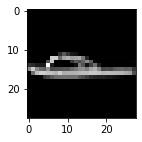

In [7]:
plot_index(30)

Next we define the MNIST model. In Keras, we overload the objects for different layers. We have a Flatten layer followed by 3 hidden layers, each with 200, 50 and 30 neurons respectively. The first two layers are softmax layers and the final layer is the softmax layer.

In [8]:
def MNIST_model(input_shape):
  X_input = Input(shape=input_shape)
  X = Flatten()(X_input)
  X = Dense(200, activation='relu', name='layer2')(X)
  X = BatchNormalization()(X)
  X = Dense(50, activation='relu', name='layer3')(X)
  X = BatchNormalization()(X)
  X = Dense(30, activation='relu', name='layer4')(X)
  X = Dense(10, activation='softmax', name='layer5')(X)
  model = Model(inputs = X_input, outputs = X, name='MNIST')
  return model

In [9]:
mnist = MNIST_model((28, 28))

In [10]:
print(mnist.summary())

Model: "MNIST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer2 (Dense)               (None, 200)               157000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
layer3 (Dense)               (None, 50)                10050     
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
layer4 (Dense)               (None, 30)                1530  

We compile our model with Adam gradient descent algorithm. The loss function is categorical crossentropy for the softmax function.

In [11]:
mnist.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [12]:
mnist.fit(x = X_train, y = y_train_enc, epochs = 15, batch_size = 16)

Epoch 1/15
60000/60000 [==============================] - 19s 319us/step - loss: 0.5404 - accuracy: 0.8076
Epoch 2/15
60000/60000 [==============================] - 21s 355us/step - loss: 0.4253 - accuracy: 0.8461
Epoch 3/15
60000/60000 [==============================] - 18s 294us/step - loss: 0.3949 - accuracy: 0.8558
Epoch 4/15
60000/60000 [==============================] - 19s 315us/step - loss: 0.3724 - accuracy: 0.8640
Epoch 5/15
60000/60000 [==============================] - 19s 314us/step - loss: 0.3558 - accuracy: 0.8697
Epoch 6/15
60000/60000 [==============================] - 18s 303us/step - loss: 0.3417 - accuracy: 0.8753
Epoch 7/15
60000/60000 [==============================] - 19s 310us/step - loss: 0.3303 - accuracy: 0.8789
Epoch 8/15
60000/60000 [==============================] - 19s 316us/step - loss: 0.3217 - accuracy: 0.8810
Epoch 9/15
60000/60000 [==============================] - 19s 313us/step - loss: 0.3113 - accuracy: 0.8846
Epoch 10/15
60000/60000 [============

In [13]:
preds_train = mnist.evaluate(x=X_train, y = y_train_enc)
print('Training::')
print ("Loss = " + str(preds_train[0]))
print ("Training Accuracy = " + str(preds_train[1]))

preds = mnist.evaluate(x = X_test, y = y_test_enc)
print('Testing::')
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

60000/60000 [==============================] - 2s 39us/step
Training::
Loss = 0.6354603328267733
Training Accuracy = 0.9135333299636841
10000/10000 [==============================] - 0s 40us/step
Testing::
Loss = 0.4804776620864868
Test Accuracy = 0.8809999823570251


As you can see here, with a simple neural network model, we could achieve 91% training and 88 percent test accuracy. One way to improve this is to use Convolutional Neural Networks, which we will do in our next project.